In [1]:
import numpy as 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_crypto = pd.read_csv('data/crypto-markets.csv')

print(df_crypto.shape)
df_crypto.head()

(942297, 13)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [3]:
df_crypto.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


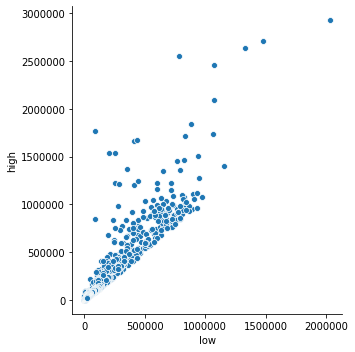

In [4]:
sns.relplot(x='low', y='high', data=df_crypto)

In [78]:
x = df_crypto[['open', 'low', 'high', 'volume', 'market']].values
y = df_crypto['close'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
# Create the model & Fit
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Predict
y_predict = reg.predict(X_test)

print(y_test)
print(y_predict)

[3.55840e-02 1.94570e-02 2.97353e-01 ... 5.21412e-01 2.36490e+02
 5.84751e-01]
[  3.31541446   3.29478582   3.57800277 ...   3.8068386  248.96825803
   3.86266639]


In [82]:
# Find the coefficient
reg_coef = reg.coef_
reg_coef

array([-3.91561586e-01,  8.28448037e-01,  5.72023135e-01,  8.92866168e-09,
       -2.29963604e-10])

In [83]:
# Find the y intercept
reg_intercept = reg.intercept_
reg_intercept

3.278350911164125

In [84]:
# Calculate the model accuracy
acc = r2_score(y_test, y_predict)
acc

0.965477576288664

In [86]:
# Create a dataframe for Actual values vs Predicted values
df_predicted = pd.DataFrame({'Actual Value': np.array(y_test.flatten()), 'Predicted Value': y_predict.flatten()})
df_predicted.head()

NameError: name 'np' is not defined